In [1]:
!pip install pandas scikit-learn xgboost matplotlib joblib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import re
import math
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import joblib

In [4]:
df = pd.read_csv('D:\\mini_project\\dataset_phishing.csv')

# Unique Feature: URL Entropy
def calculate_entropy(url):
    prob = [v / len(url) for v in Counter(url).values()]
    return -sum(p * math.log2(p) for p in prob) if len(url) > 0 else 0

df['url_entropy'] = df['url'].apply(calculate_entropy)
df['Label'] = df['status'].map({'legitimate': 0, 'phishing': 1})

In [5]:
X = df.drop(columns=['url', 'status', 'Label']).copy()
X['url_entropy'] = df['url_entropy']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

c:\Users\Cherishya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [7]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1143
           1       0.96      0.97      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



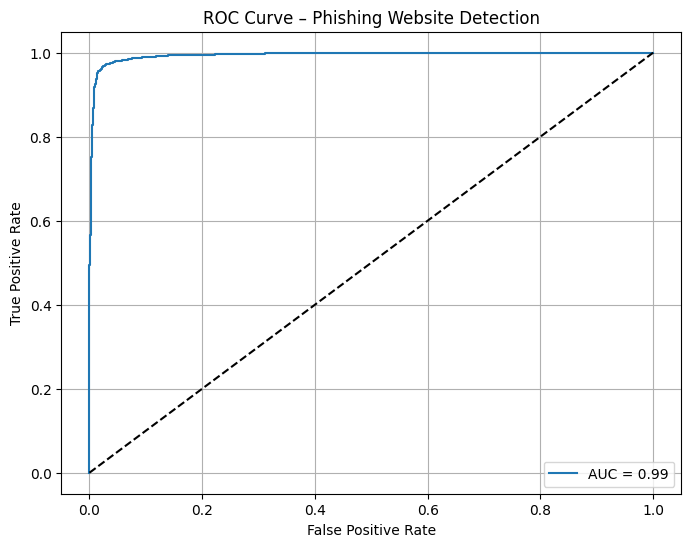

In [8]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Phishing Website Detection')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
joblib.dump(model, 'xgb_web_model.pkl')
joblib.dump(scaler, 'web_scaler.pkl')
joblib.dump(X.columns.tolist(), 'web_features.pkl')

['web_features.pkl']